### Heroes Of Pymoli Data Analysis

-----

- Even though women averaged higher purchase amounts, men had higher purchase values due to the fact that 84% of the players are men. 
- The majority of the players make up the 20-24 age range with a 44% while the greatest minority is the +40 players only coming in at 2%. 
- The 20-24 year age range tends to make more puchases (365 purchases), and the 35-39 age range tends to spend the most per purchase ($3.60). 

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [22]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

## Player Count

* Display the total number of players


In [23]:
total_players = (purchase_data['SN'].unique())
total_player_df = pd.DataFrame(total_players.count())
total_player_df.rename(index={0:'Total Players'}, inplace=True)
total_player_df.T

,Total Players
0,576


## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [24]:
#Number of Unique Items,Average Purchase Price,Total Number of Purchases, Total Revenue

purchase_data['Number of Unique Items']=purchase_data['Item ID'].nunique()
purchase_data['Average Price']=purchase_data['Price'].mean().round(2)
purchase_data['Number of Purchases']=purchase_data['Purchase ID'].count()
purchase_data['Total Revenue']=purchase_data['Price'].sum()
purchase_data[['Number of Unique Items','Average Price','Number of Purchases','Total Revenue']].head(1)

,Number of Unique Items,Average Price,Number of Purchases,Total Revenue
0,183,3.05,780,2379.77


## Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




In [25]:
#Percentage and Count of Male Players, Percentage and Count of Female Players, Percentage and Count of Other / Non-Disclosed
gender_of_players = pd.DataFrame(purchase_data.groupby('Gender')['SN'].nunique())
gender_of_players['Total Count'] = gender_of_players.groupby('Gender')['SN'].sum()
gender_of_players['Percentage of Players'] = gender_of_players['Total Count'] / 576 * 100
gender_of_players[['Total Count','Percentage of Players']].head()

,Total Count,Percentage of Players
Gender,,
Female,81,14.062500
Male,484,84.027778
Other / Non-Disclosed,11,1.909722



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [26]:
gender_by_purchase = pd.DataFrame(purchase_data.groupby('Gender')['Purchase ID'].nunique())

gender_by_purchase['Purchase Count'] = purchase_data.groupby('Gender')['Price'].count()
gender_by_purchase['Average Purchase Price'] = purchase_data.groupby('Gender')['Price'].mean().round(2)
gender_by_purchase['Total Purchase Value'] = purchase_data.groupby('Gender')['Price'].sum()
gender_by_purchase['Average Total Purchase per Person'] = purchase_data.groupby('Gender')['Price'].sum() / gender_of_players['Total Count']

gender_by_purchase[['Purchase Count','Average Purchase Price','Total Purchase Value','Average Total Purchase per Person']].head()

,Purchase Count,Average Purchase Price,Total Purchase Value,Average Total Purchase per Person
Gender,,,,
Female,113,3.20,361.94,4.468395
Male,652,3.02,1967.64,4.065372
Other / Non-Disclosed,15,3.35,50.19,4.562727


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [115]:
purchase_data['Age Bins'] = pd.cut(purchase_data['Age'], bins=[0, 9, 14, 19, 24, 29, 34, 39, 150], labels=['<10', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40+'])

age_summary_df = pd.DataFrame(purchase_data.groupby('Age Bins')['SN'].nunique())
age_summary_df['Percentage of Players'] = age_summary_df['SN']/age_summary_df['SN'].sum() * 100 

age_summary_df.columns = ['Total Count', 'Percentage of Players']

age_summary_df.head(8)

,Total Count,Percentage of Players
Age Bins,,
<10,17,2.951389
10-14,22,3.819444
15-19,107,18.576389
20-24,258,44.791667
25-29,77,13.368056
30-34,52,9.027778
35-39,31,5.381944
40+,12,2.083333


## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [134]:
purchase_summary_df = pd.DataFrame(purchase_data.groupby('Age Bins')['Purchase ID'].count())

purchase_summary_df['Average Purchase Price'] = purchase_data.groupby('Age Bins')['Price'].mean().round(2)
purchase_summary_df['Total Purchase Value'] = purchase_data.groupby('Age Bins')['Price'].sum()
purchase_summary_df['Avg Total Purchase per Person'] = purchase_data.groupby('Age Bins')['Price'].sum()/purchase_data.groupby('Age Bins')['SN'].nunique()

purchase_summary_df.head(8)

,Purchase ID,Average Purchase Price,Total Purchase Value,Avg Total Purchase per Person
Age Bins,,,,
<10,23,3.35,77.13,4.537059
10-14,28,2.96,82.78,3.762727
15-19,136,3.04,412.89,3.858785
20-24,365,3.05,1114.06,4.318062
25-29,101,2.90,293.00,3.805195
30-34,73,2.93,214.00,4.115385
35-39,41,3.60,147.67,4.763548
40+,13,2.94,38.24,3.186667


## Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [43]:
big_spenders_df = pd.DataFrame(purchase_data.groupby('SN')['Purchase ID'].nunique())

big_spenders_df['Purchase Count'] = purchase_data.groupby('SN')['Price'].count()
big_spenders_df['Average Purchase Price'] = purchase_data.groupby('SN')['Price'].mean().round(2)
big_spenders_df['Total Purchase Value'] = purchase_data.groupby('SN')['Price'].sum()

big_spenders_df.sort_values('Total Purchase Value',inplace=True,ascending=False)

big_spenders_df[['Purchase Count','Average Purchase Price','Total Purchase Value']].head()

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.79,18.96
Idastidru52,4,3.86,15.45
Chamjask73,3,4.61,13.83
Iral74,4,3.40,13.62
Iskadarya95,3,4.37,13.10


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [75]:
most_pop_df = purchase_data.groupby(['Item ID','Item Name']).agg({'Price':['count',min,sum,]})
most_pop_df.columns = ['Purchase Count','Item Price','Total Purchase Value']

most_pop_df.sort_values('Purchase Count',ascending=False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [103]:
most_pop_df.sort_values('Total Purchase Value', ascending=False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


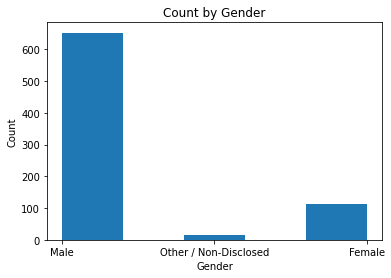

In [101]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.hist(purchase_data['Gender'],bins=5)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title("Count by Gender")
plt.show()
#This graph shows that a majority of the players are male. 

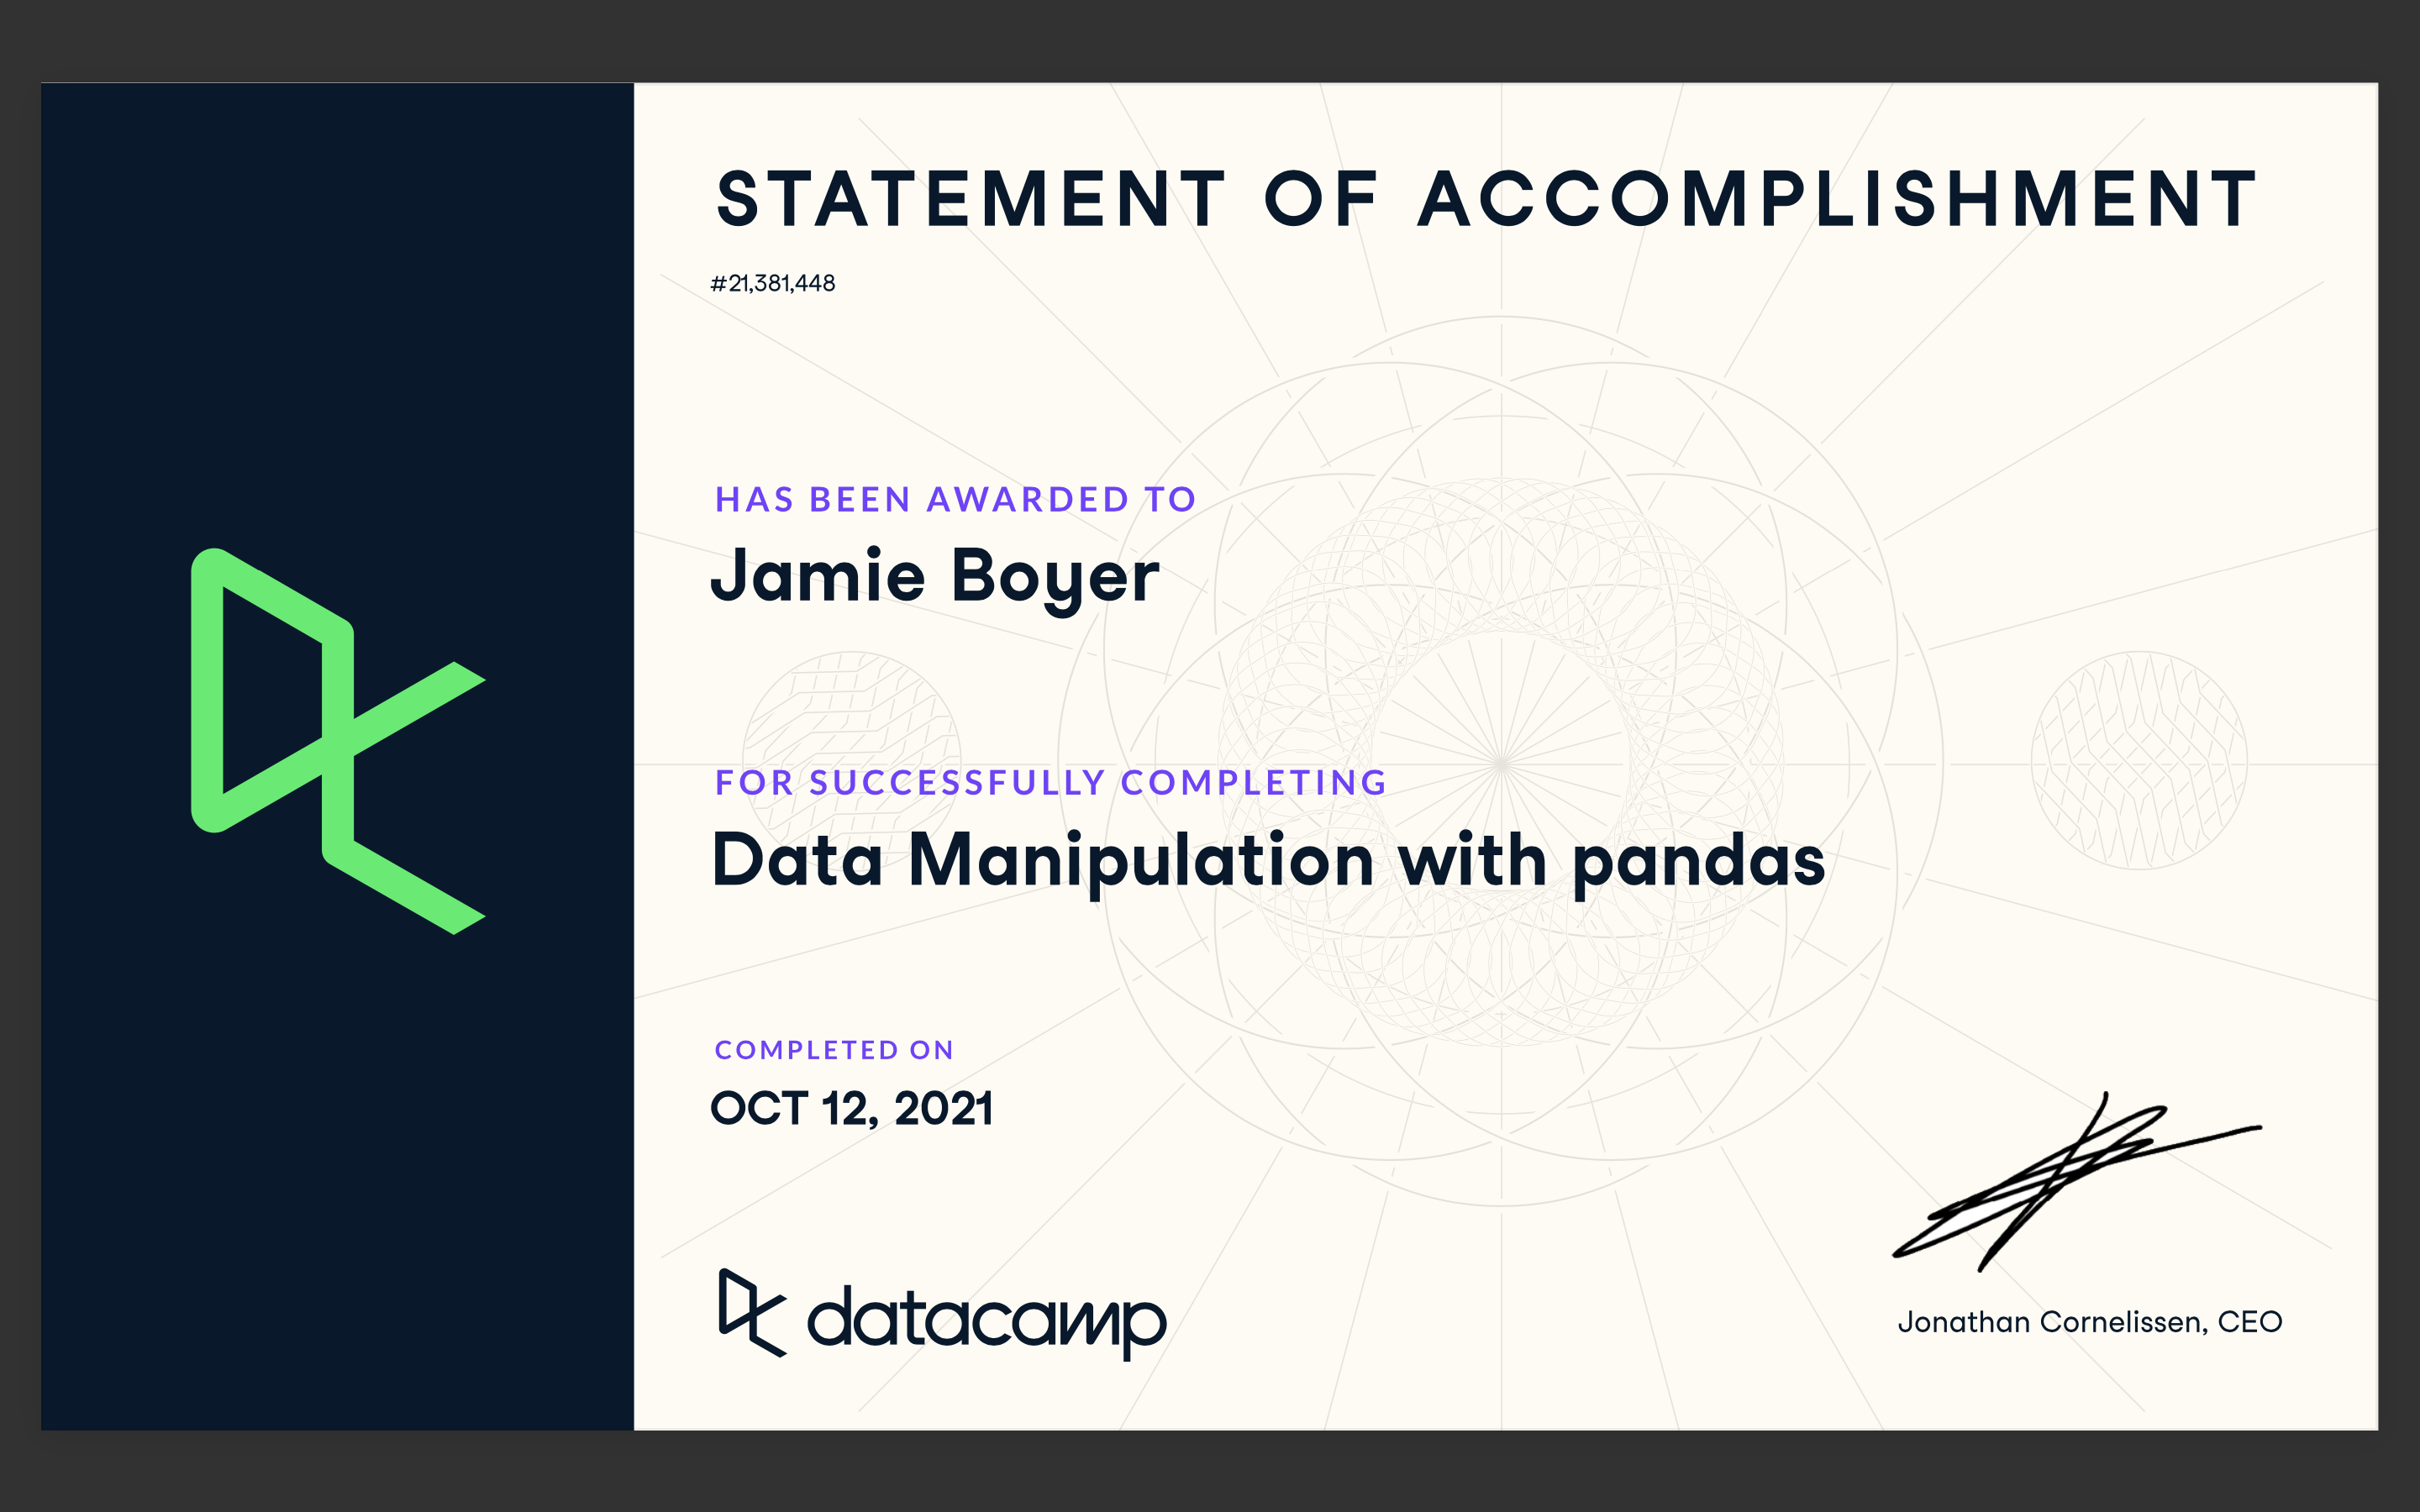